# Data Scientist Salaries - Data Processing and analysis  

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.preprocessing import LabelEncoder

## Data Preparation

In [42]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [44]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [45]:
duplicates = df[df.duplicated()]

In [46]:
duplicates

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [47]:
df.drop_duplicates()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [48]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [49]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [50]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

In [51]:
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [52]:
df['employment_type'] = df['employment_type'].replace('FT','Full-Time')
df['employment_type'] = df['employment_type'].replace('PT','Part-Time')
df['employment_type'] = df['employment_type'].replace('CT','Contract')
df['employment_type'] = df['employment_type'].replace('FL','Freelance')

In [53]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [55]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level/Expert,Full-Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Mid-level/Intermediate,Contract,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Mid-level/Intermediate,Contract,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior-level/Expert,Full-Time,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior-level/Expert,Full-Time,Data Scientist,120000,USD,120000,CA,100,CA,M


In [56]:
df.drop(['salary','salary_currency',"employee_residence"] , axis='columns', inplace = True)


In [57]:
df.head(20)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2023,Senior-level/Expert,Full-Time,Principal Data Scientist,85847,100,ES,L
1,2023,Mid-level/Intermediate,Contract,ML Engineer,30000,100,US,S
2,2023,Mid-level/Intermediate,Contract,ML Engineer,25500,100,US,S
3,2023,Senior-level/Expert,Full-Time,Data Scientist,175000,100,CA,M
4,2023,Senior-level/Expert,Full-Time,Data Scientist,120000,100,CA,M
5,2023,Senior-level/Expert,Full-Time,Applied Scientist,222200,0,US,L
6,2023,Senior-level/Expert,Full-Time,Applied Scientist,136000,0,US,L
7,2023,Senior-level/Expert,Full-Time,Data Scientist,219000,0,CA,M
8,2023,Senior-level/Expert,Full-Time,Data Scientist,141000,0,CA,M
9,2023,Senior-level/Expert,Full-Time,Data Scientist,147100,0,US,M


Visualization

<Axes: >

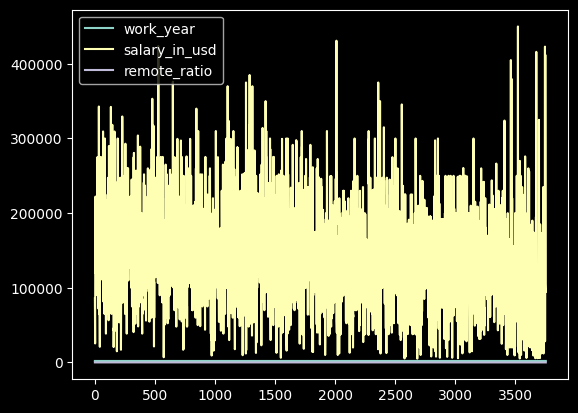

In [58]:
df.plot()

<Axes: ylabel='Frequency'>

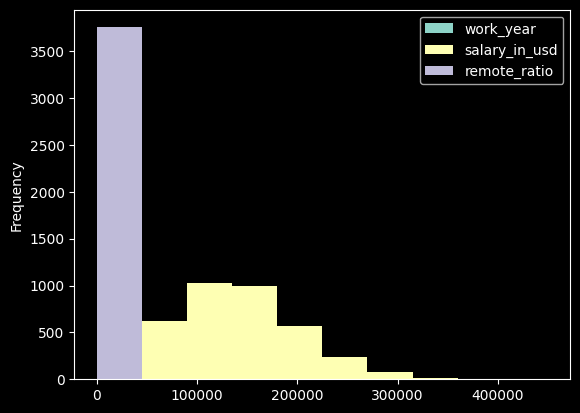

In [59]:
df.plot.hist()

<Axes: ylabel='Density'>

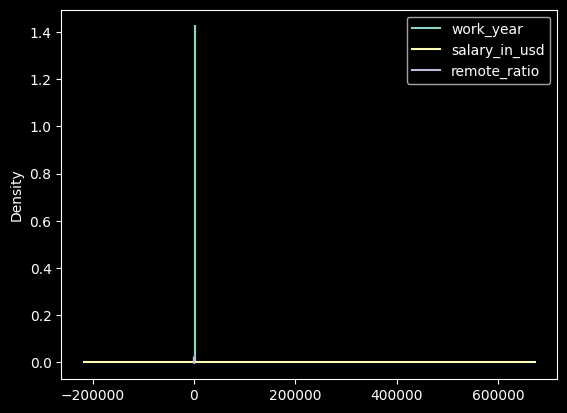

In [60]:
df.plot.kde()

Salary Distribution in USD

C:\Users\youse\AppData\Local\Temp\ipykernel_25548\428366924.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['salary_in_usd'], shade=True, color='#472d7b', alpha=0.6)


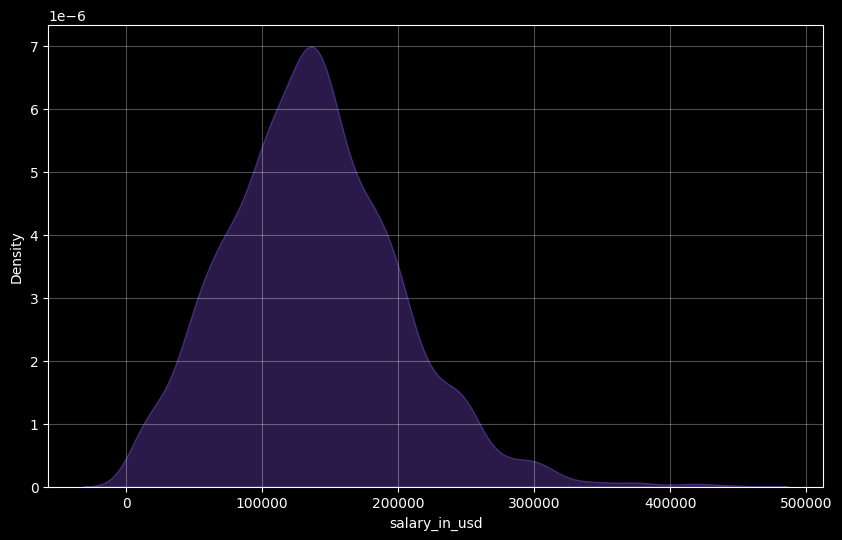

In [61]:
plt.figure(figsize = (10, 6))
sns.kdeplot(df['salary_in_usd'], shade=True, color='#472d7b', alpha=0.6)
plt.grid(alpha=0.3)

Distribution of Work Years


Text(0.5, 1.0, 'Distribution of Work Years')

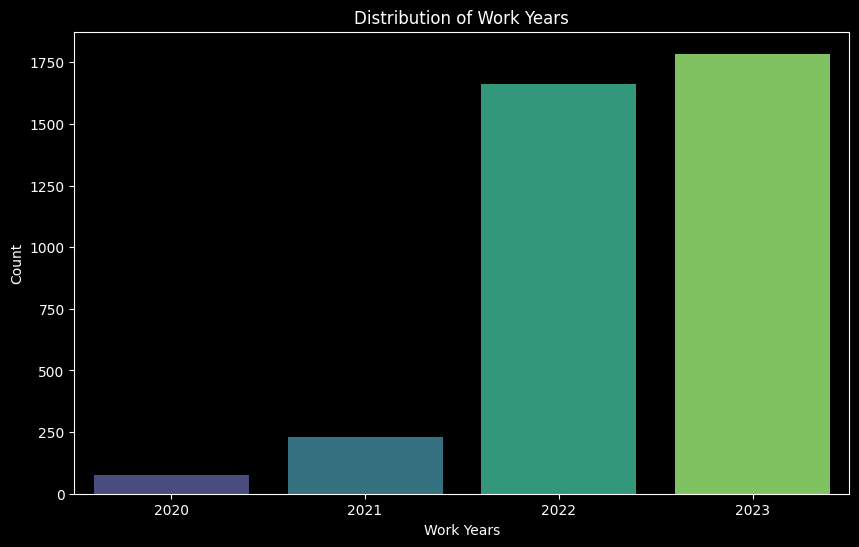

In [62]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'work_year', palette = 'viridis')
# Add a title and axis labels
plt.xlabel('Work Years')
plt.ylabel('Count')
plt.title('Distribution of Work Years')

Distribution of Experience Levels

Text(0.5, 1.0, 'Distribution of Experience Levels')

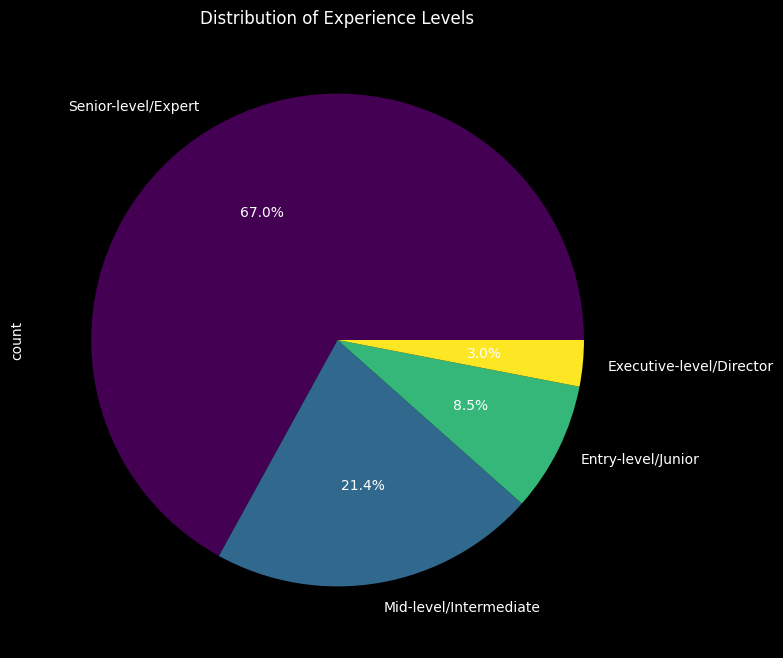

In [63]:
plt.figure(figsize = (10, 8))
# Create the pie chart
df['experience_level'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='viridis')
# Add a title 
plt.title('Distribution of Experience Levels')

Distribution of Employment Types

[Text(0, 0, '113'), Text(0, 0, '1'), Text(0, 0, '0'), Text(0, 0, '0')]

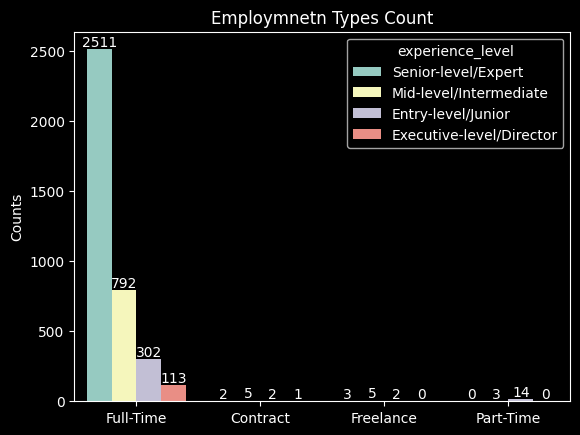

In [64]:
fig, ax = plt.subplots()
sns.countplot(ax = ax, data = df, x = df.employment_type, hue = 'experience_level')

ax.set(xlabel='', ylabel='Counts', title='Employmnetn Types Count')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])


Average salaries based on experience levels


[Text(0, 2, '149367'),
 Text(0, 2, '27750'),
 Text(0, 2, '50000'),
 Text(0, 2, '17779')]

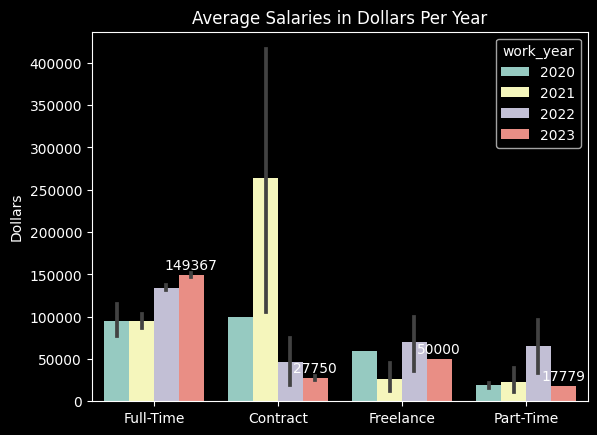

In [65]:
avg_salaries = df.groupby('employment_type')['salary_in_usd'].mean().round(0).sort_values(ascending = False).reset_index()
fig, ax = plt.subplots()
sns.barplot(ax =ax,data = df , x = 'employment_type', y = 'salary_in_usd', hue = 'work_year')
ax.set(xlabel='', ylabel='Dollars', title='Average Salaries in Dollars Per Year')
ax.bar_label(ax.containers[3], padding = 2)

Top 10 Job Titles

Text(0.5, 1.0, 'Top 10 Job Titles')

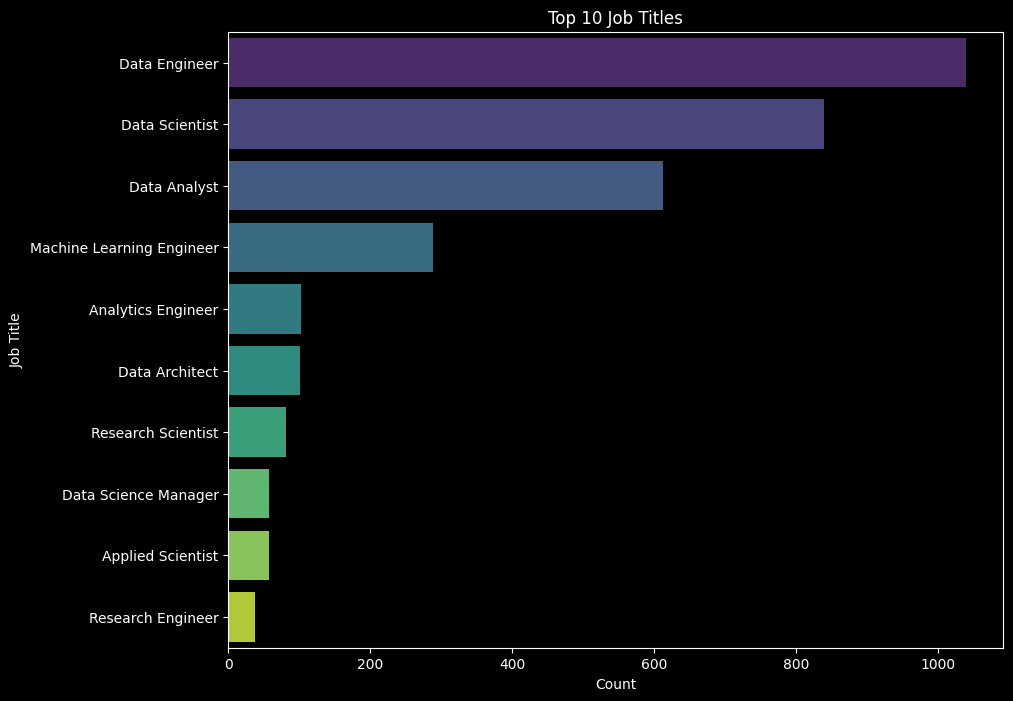

In [66]:
plt.figure(figsize = (10, 8))
top_jobs = df['job_title'].value_counts().nlargest(10)

# Create the bar chart
sns.barplot(x = top_jobs, y = top_jobs.index, palette = 'viridis')

# Add a title and axis labels
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles')

C:\Users\youse\AppData\Local\Temp\ipykernel_25548\1735381263.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 2, i)
C:\Users\youse\AppData\Local\Temp\ipykernel_25548\1735381263.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = feature, kde = True, alpha = 1, palette = 'viridis')
C:\Users\youse\AppData\Local\Temp\ipykernel_25548\1735381263.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 2, i)
C:\Users\youse\AppData\Local\Temp\ipykernel_25548\1735381263.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = feature, kde = True, alpha = 1, palette = 'viridis')
C:\Users\youse\App

<Figure size 1500x2800 with 0 Axes>

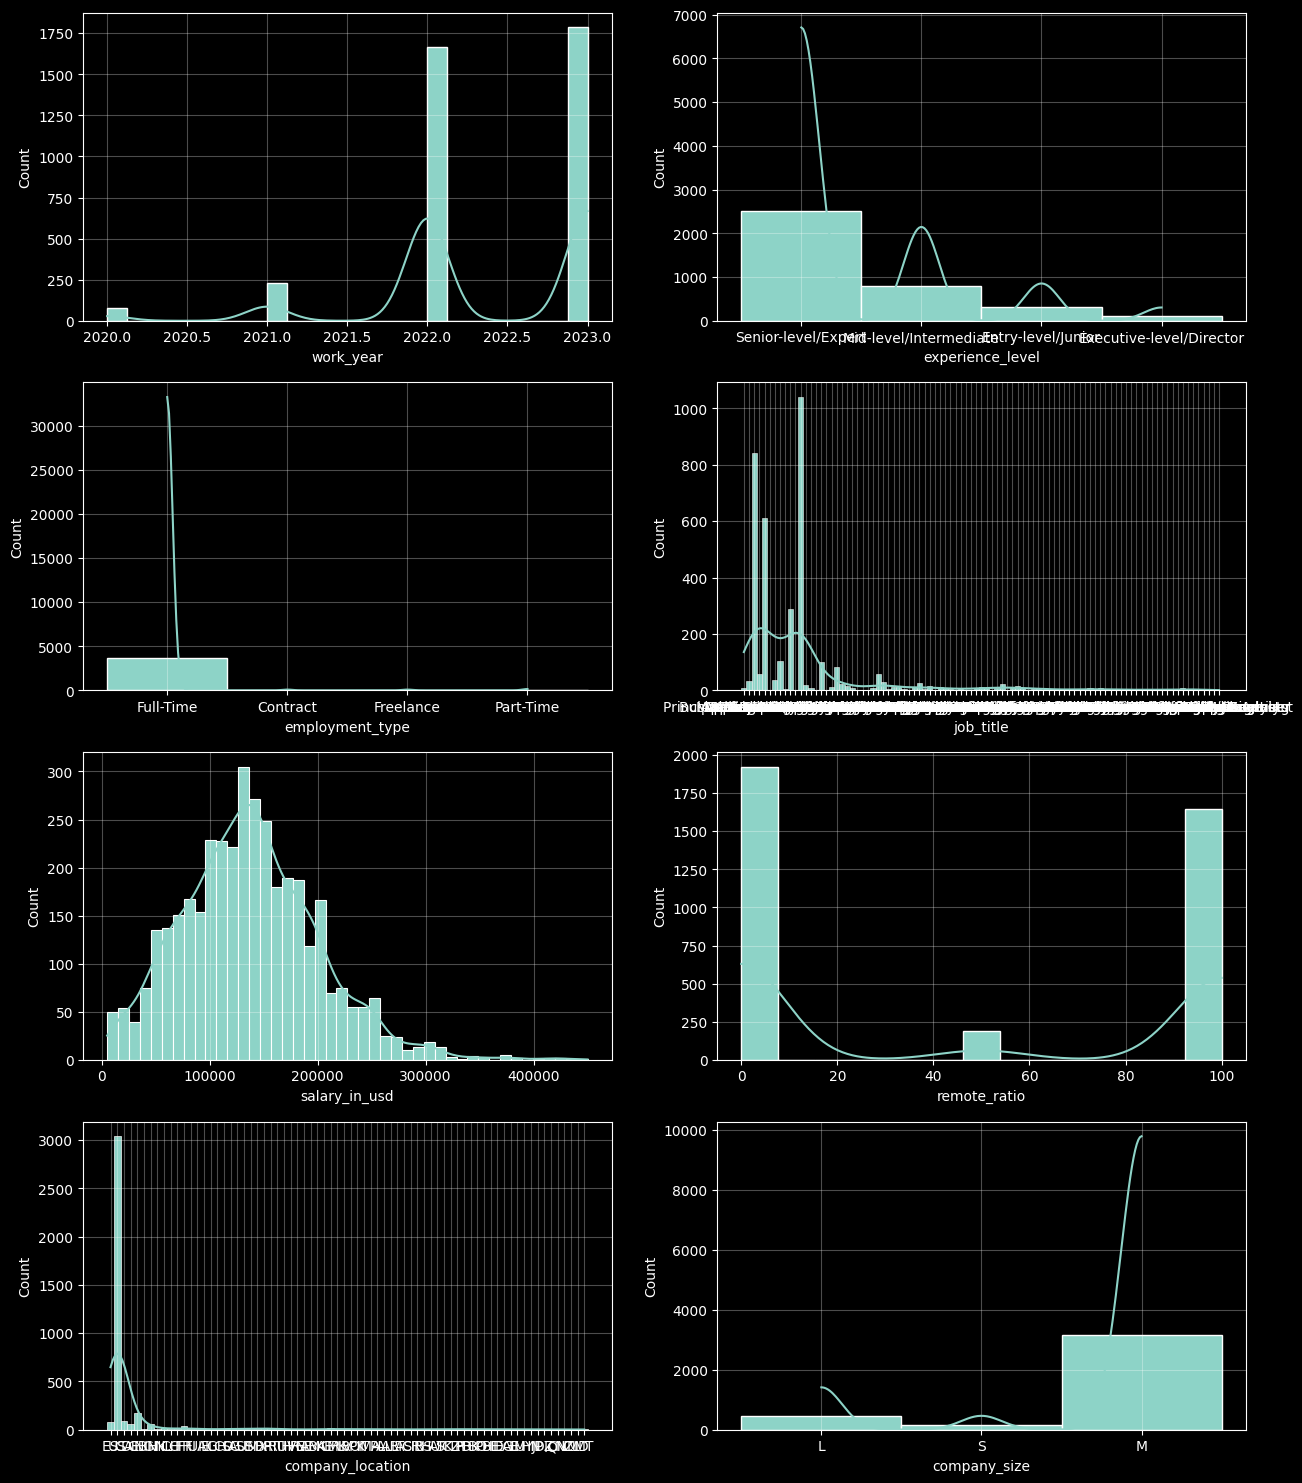

In [67]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (15, 28))

# Adjust subplot vertical spacing
plt.subplots_adjust(hspace = 0.2)

# 6x2 subplot figure
fig, axs = plt.subplots(2, 2, figsize=(15, 28))

i = 1
# Loop through dataframe columns
for feature in df.columns:
    # Create a subplot
    plt.subplot(6, 2, i)
    # Create histogram
    sns.histplot(data = df, x = feature, kde = True, alpha = 1, palette = 'viridis')
    plt.grid(alpha = 0.3)
    i += 1
    
# Show the plot
plt.show()

In [68]:
# Extract categorical variables
cat_vars = ['experience_level', 'employment_type', 'job_title', 'company_location', 'company_size']

# Create LabelEncoder object
encoder = LabelEncoder()

# Encode categorical variables as integers
for var in cat_vars:
    df[var] = encoder.fit_transform(df[var])

## Data Transformation / Scalling

In [69]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2023,3,2,84,85847,100,25,0
1,2023,2,0,66,30000,100,70,2
2,2023,2,0,66,25500,100,70,2
3,2023,3,2,47,175000,100,12,1
4,2023,3,2,47,120000,100,12,1


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

<Axes: ylabel='Frequency'>

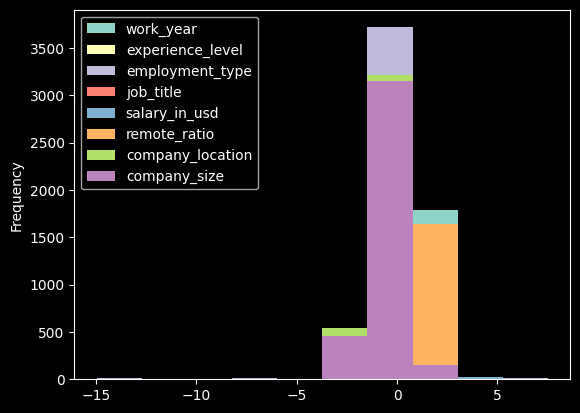

In [71]:
df_scaled.plot.hist()

<Axes: ylabel='Density'>

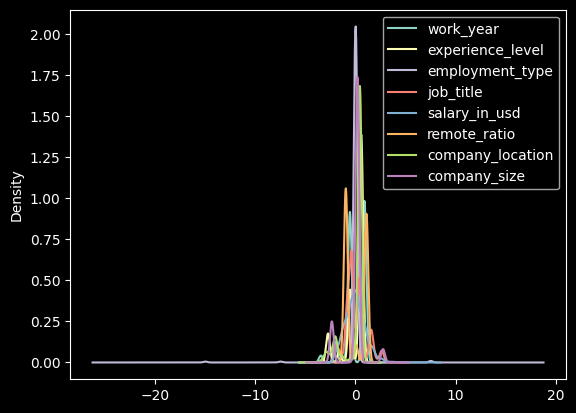

In [72]:
df_scaled.plot.kde()

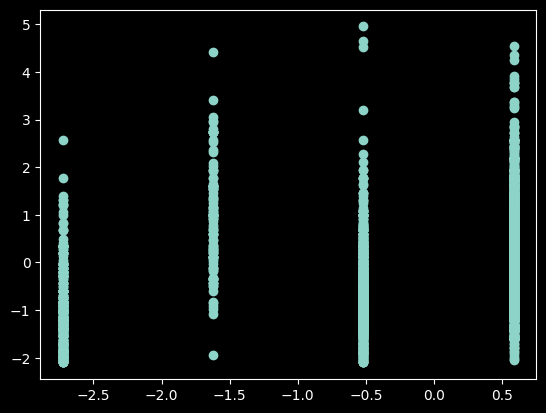

In [73]:
plt.scatter(df_scaled.experience_level, df_scaled.salary_in_usd)

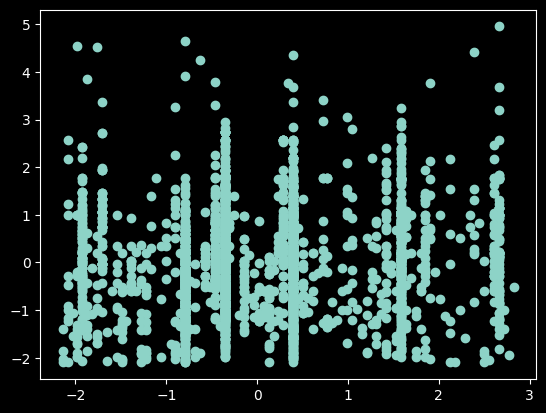

In [74]:
plt.scatter(df_scaled.job_title, df_scaled.salary_in_usd)

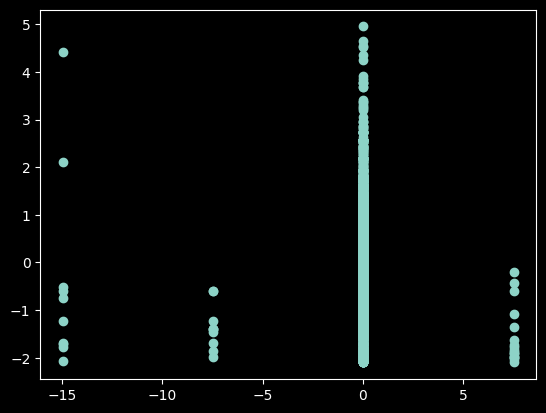

In [75]:
plt.scatter(df_scaled.employment_type, df_scaled.salary_in_usd)

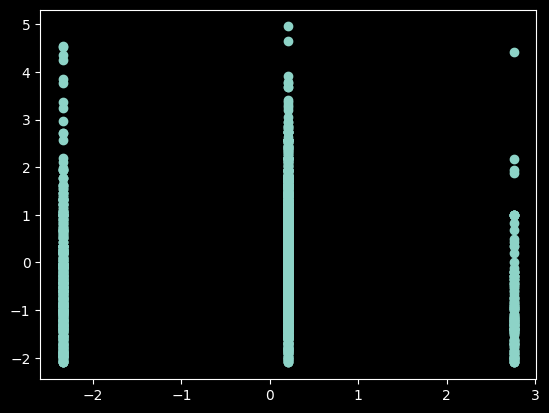

In [76]:
plt.scatter(df_scaled.company_size, df_scaled.salary_in_usd)

### As shown the result not good due to outliers, so we will use Robust Scaller.

In [77]:
from sklearn import preprocessing
df_scaled = preprocessing.RobustScaler().fit_transform(df)
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

<Axes: ylabel='Frequency'>

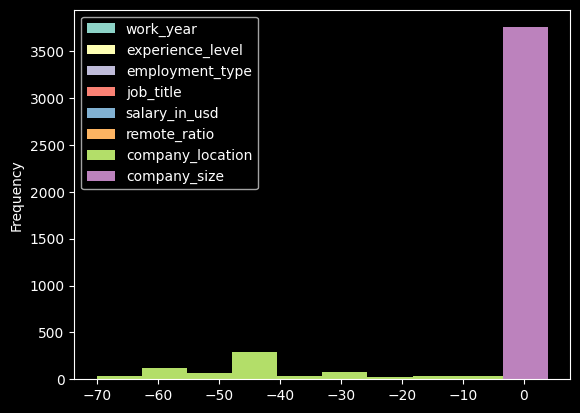

In [78]:
pd.DataFrame(df_scaled, columns = df.columns).plot.hist()

<Axes: ylabel='Density'>

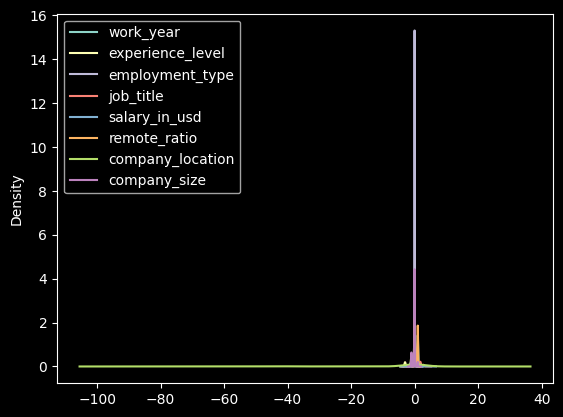

In [79]:
pd.DataFrame(df_scaled, columns = df.columns).plot.kde()

## Feature Selection

## Regression - Salary Prediction

In this section, a regression model is going to be trained and tested to predict the salaries of Data Scientists based on the other featuress.

In the following cell, data is split into train and test sets using `sklearn.train_test_split`.

In [80]:
#import train_test_split
from sklearn.model_selection import train_test_split

#seperating features and target
features = df.drop('salary_in_usd', axis=1)
target = df['salary_in_usd'].values

#split dataset into training and test features and targets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=False)

Scaling the training and test sets in order to start training. The test sets are scaled using the paramaters gained from fitting the scaler to the training sets. This decreases bias in the testing of the model.

In [81]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#reshaping y_train & y_test to apply the scaling transformation
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)


In the following cells, the model is built and tested.

In [82]:
#importing required library to build a neural network model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [83]:
#Exploring X_train
print(X_train.shape)
df2 = pd.DataFrame(X_train)
df2.head()

(3004, 7)


,0,1,2,3,4,5,6
0,0.0,0.0,0.0,2.649351,1.0,-45.0,-1.0
1,0.0,-1.0,-2.0,1.714286,1.0,0.0,1.0
2,0.0,-1.0,-2.0,1.714286,1.0,0.0,1.0
3,0.0,0.0,0.0,0.727273,1.0,-58.0,0.0
4,0.0,0.0,0.0,0.727273,1.0,-58.0,0.0


In [84]:
#Exploring y_train
df3 = pd.DataFrame(y_test)
df3.head()

,0
0,0.391632
1,-0.065272
2,-0.541679
3,-0.863157
4,-0.300251


A `Sequential` model is built comprising four `Dense` (fully interconnected) layers. It uses the non-linear `RELU` activation function for the hidden layers, and a `linear` output layer. `L2 kernel regularization` is introduced in order to prevent overfitting and promote good generalization to test scenarios.

In [88]:
#constructing model
model = Sequential([
    tf.keras.Input(shape=(7,)),
    Dense(units = 25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    Dense(units = 10, activation = 'relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    Dense(units = 5, activation = 'relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    Dense(units = 1, activation = 'linear')
])

Model will use the `Adam`(adaptive moment estimation) optimization algorithm, and the `Mean Squared Error` loss function. It is initialized with a `Learning Rate` of 0.0001.

In [89]:
#compiling and summarizing model
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
model.compile(optimizer = Adam(learning_rate = 0.001), loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 25)                200       
                                                                 
 dense_5 (Dense)             (None, 10)                260       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


Now the model is ready to be fit to the data. It is run for a 200 `epochs`.

In [90]:
history = model.fit(X_train, y_train, validation_split= 0.2 ,epochs = 200)

Epoch 1/200
76/76 [==============================] - 1s 4ms/step - loss: 0.6009 - val_loss: 0.4699
Epoch 2/200
76/76 [==============================] - 0s 3ms/step - loss: 0.5630 - val_loss: 0.4541
Epoch 3/200
76/76 [==============================] - 0s 2ms/step - loss: 0.5497 - val_loss: 0.4785
Epoch 4/200
76/76 [==============================] - 0s 3ms/step - loss: 0.5454 - val_loss: 0.4482
Epoch 5/200
76/76 [==============================] - 0s 3ms/step - loss: 0.5380 - val_loss: 0.4528
Epoch 6/200
76/76 [==============================] - 0s 2ms/step - loss: 0.5352 - val_loss: 0.4447
Epoch 7/200
76/76 [==============================] - 0s 2ms/step - loss: 0.5359 - val_loss: 0.4436
Epoch 8/200
76/76 [==============================] - 0s 2ms/step - loss: 0.5313 - val_loss: 0.4623
Epoch 9/200
76/76 [==============================] - 0s 2ms/step - loss: 0.5353 - val_loss: 0.4364
Epoch 10/200
76/76 [==============================] - 0s 2ms/step - loss: 0.5295 - val_loss: 0.4401
Epoch 11/

Training finished with loss of = 0.4468 on the training set. It can be said that the model has `low bias`, i.e. fits the training data well. However, the validation loss suggests little over fittin, for it has a 3% increase over the training loss. The model will be further tested for generalization and overfitting over the test set.

Forward propogation will be used to predict the target for the test set `y_hat`, which will be compared with the true target `y_test`

In [91]:
y_hat = model.predict(X_test)

24/24 [==============================] - 0s 1ms/step


The `mean_squared_error` function is imported from `sklearn` to be applied between `y_hat` and `y_test`

In [92]:
#
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred = y_hat, y_true = y_test)

0.5403357265964686

As can be seen, test error is 0.5347, which compared to the training error of 0.4468 is a 19.6% increase in error. The model can be said to have high varianve, thus, further improvement is needed.

Real values of `y_hat` and `y_test` can be compared by applying the inverse transformation to the data.

In [93]:
y_hat_real = pd.DataFrame(scaler.inverse_transform(y_hat))
y_test_real = pd.DataFrame(scaler.inverse_transform(y_test))
pd.concat([y_hat_real, y_test_real], axis = 1)

,0,0
0,176790.937500,170000.0
1,176790.937500,135000.0
2,74853.578125,98506.0
3,74853.578125,73880.0
4,121036.265625,117000.0
...,...,...
746,165865.875000,412000.0
747,139321.421875,151000.0
748,152251.234375,105000.0
749,88359.851562,100000.0


It can be seen the model has high error margins. There are few things that can be improved. 
1. The model architecture can be changed, such as the number of hidden layers and/or neurons.
2. The hyperparametres can be adjusted, such the learning rate or regularization parametres.
3. More training epochs might be needed.
4. Further data collection and preperation might be needed.
5. Use a different machine learning algorithm such as XGBoost

### Regression using XGBoost

In this section, an XGBoost learning model will be built to further improve predictions. The `XGBRegressor` class from `xgboost` is used to build the model.

In [94]:
#xgboost library and the XGBRegressor class are imported
import xgboost as xgb
from xgboost import XGBRegressor

`XGBRegressor` is initialized with a squared error loss function for the regression task, and a `random_state` to produce repeatable results.

In [95]:
# define the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# train the model using X_train and y_train
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

The model is tested on the test set using `xgb_model.predict`, and evaluated using the `sklearn` function `mean_squared_error`.

In [96]:
# make predictions on the test set
y_pred = xgb_model.predict(X_test)

# evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.5016104277709611


In [97]:
y_pred_real = pd.DataFrame(scaler.inverse_transform(y_hat))
pd.concat([y_pred_real, y_test_real], axis = 1)

,0,0
0,176790.937500,170000.0
1,176790.937500,135000.0
2,74853.578125,98506.0
3,74853.578125,73880.0
4,121036.265625,117000.0
...,...,...
746,165865.875000,412000.0
747,139321.421875,151000.0
748,152251.234375,105000.0
749,88359.851562,100000.0


As can be seen, results are slightly better suggesting better generalization and less variance(overfitting).